<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="UTF-8">
<meta name="viewport" content="width=device-width, initial-scale=1.0">
<style>
    h1 {
        line-height: 200%;
        font-family: 'Comic Sans MS', cursive, sans-serif;
        color: #ffb6c1; /* رنگ نارنجی پاستیلی */
    }
</style>
</head>
<body>
    <h1>Zahra Alinaghipour</h1>
</body>
</html>

In this project, we aim to explore the extent to which neural networks can possess artistic understanding. 🎨 We will also investigate the implementation of transfer learning and image data augmentation and their impact on model performance. The dataset we have consists of several hundred paintings by several renowned artists worldwide, and our goal is to train a deep learning model that can, like an art expert, correctly guess the artist of a painting whose creator is yet unknown.

In [2]:
# uncomment the following line if you are running this notebook on Google Colab
# this will install the most recent version of TensorFlow and Keras 3
!pip install tensorflow --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 771.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 101.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 87.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 105.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 80.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 42.5 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
  

In [3]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

In [4]:
import keras
print(keras.__version__)

3.4.1


In [5]:
import os, glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, accuracy_score

Due to the large size of the dataset, it needs to be downloaded separately from [this link](https://drive.google.com/file/d/1hZK1rshl4dJVEPkUPykU5cZs_ANyTWp-/view?usp=sharing) and the files extracted. Please note that the dataset is approximately 580 MB in size, and we recommend using Google Colab to directly download this file using the following command.

`!gdown 1-0d315aj7Ai8NNqat65XDvaOcHDcHiUD`

<b>Fixing the issue of not being able to download the file with <code>gdown</code></b></summary>

If you encounter an access denied error while downloading the file using <code>gdown</code>, simply run the following code and try again.

`!pip install --upgrade --no-cache-dir gdown`

In [6]:
# uncomment the following line to prevent some possible errors
!pip install --upgrade --no-cache-dir gdown

  Attempting uninstall: gdown
    Found existing installation: gdown 5.1.0
    Uninstalling gdown-5.1.0:
      Successfully uninstalled gdown-5.1.0


In [7]:
# uncomment the following line to download the dataset if you haven't already
!gdown 1-0d315aj7Ai8NNqat65XDvaOcHDcHiUD

Downloading...
From (original): https://drive.google.com/uc?id=1-0d315aj7Ai8NNqat65XDvaOcHDcHiUD
From (redirected): https://drive.google.com/uc?id=1-0d315aj7Ai8NNqat65XDvaOcHDcHiUD&confirm=t&uuid=a4f60849-e4d0-477e-bc6d-704fbc01d93d
To: /content/famous_paintings.zip
100% 611M/611M [00:03<00:00, 166MB/s]


In [8]:
# uncomment the following line to unzip the dataset if you didn't do it before
!unzip famous_paintings.zip > /dev/null 2>&1

In [16]:
dir_name = 'data/*'
files = glob.glob(dir_name)
df_train = pd.DataFrame({'full_path': files})
file_name = df_train['full_path'].str.split('data/').str[1]
painters = file_name.str.rsplit('_', n = 1).str[0]
df_train['painter'] = painters
df_train.head()

full_path                painter
0  data/Pierre-Auguste_Renoir_7.jpg  Pierre-Auguste_Renoir
1          data/Paul_Gauguin_80.jpg           Paul_Gauguin
2        data/Alfred_Sisley_257.jpg          Alfred_Sisley
3        data/Pablo_Picasso_266.jpg          Pablo_Picasso
4         data/Marc_Chagall_100.jpg           Marc_Chagall

In [17]:
# get the list of unique painters in the dataset
class_names = df_train.painter.unique()
print(class_names)

['Pierre-Auguste_Renoir' 'Paul_Gauguin' 'Alfred_Sisley' 'Pablo_Picasso'
 'Marc_Chagall' 'Vincent_van_Gogh' 'Rene_Magritte' 'Titian'
 'Amedeo_Modigliani' 'Albrecht_Durer' 'Edgar_Degas' 'Peter_Paul_Rubens'
 'Kazimir_Malevich' 'Rembrandt' 'Francisco_Goya' 'Salvador_Dali'
 'Henri_Matisse' 'Leonardo_da_Vinci' 'Sandro_Botticelli' 'Paul_Klee'
 'Andy_Warhol' 'Pieter_Bruegel' 'Hieronymus_Bosch' 'Mikhail_Vrubel'
 'Frida_Kahlo']


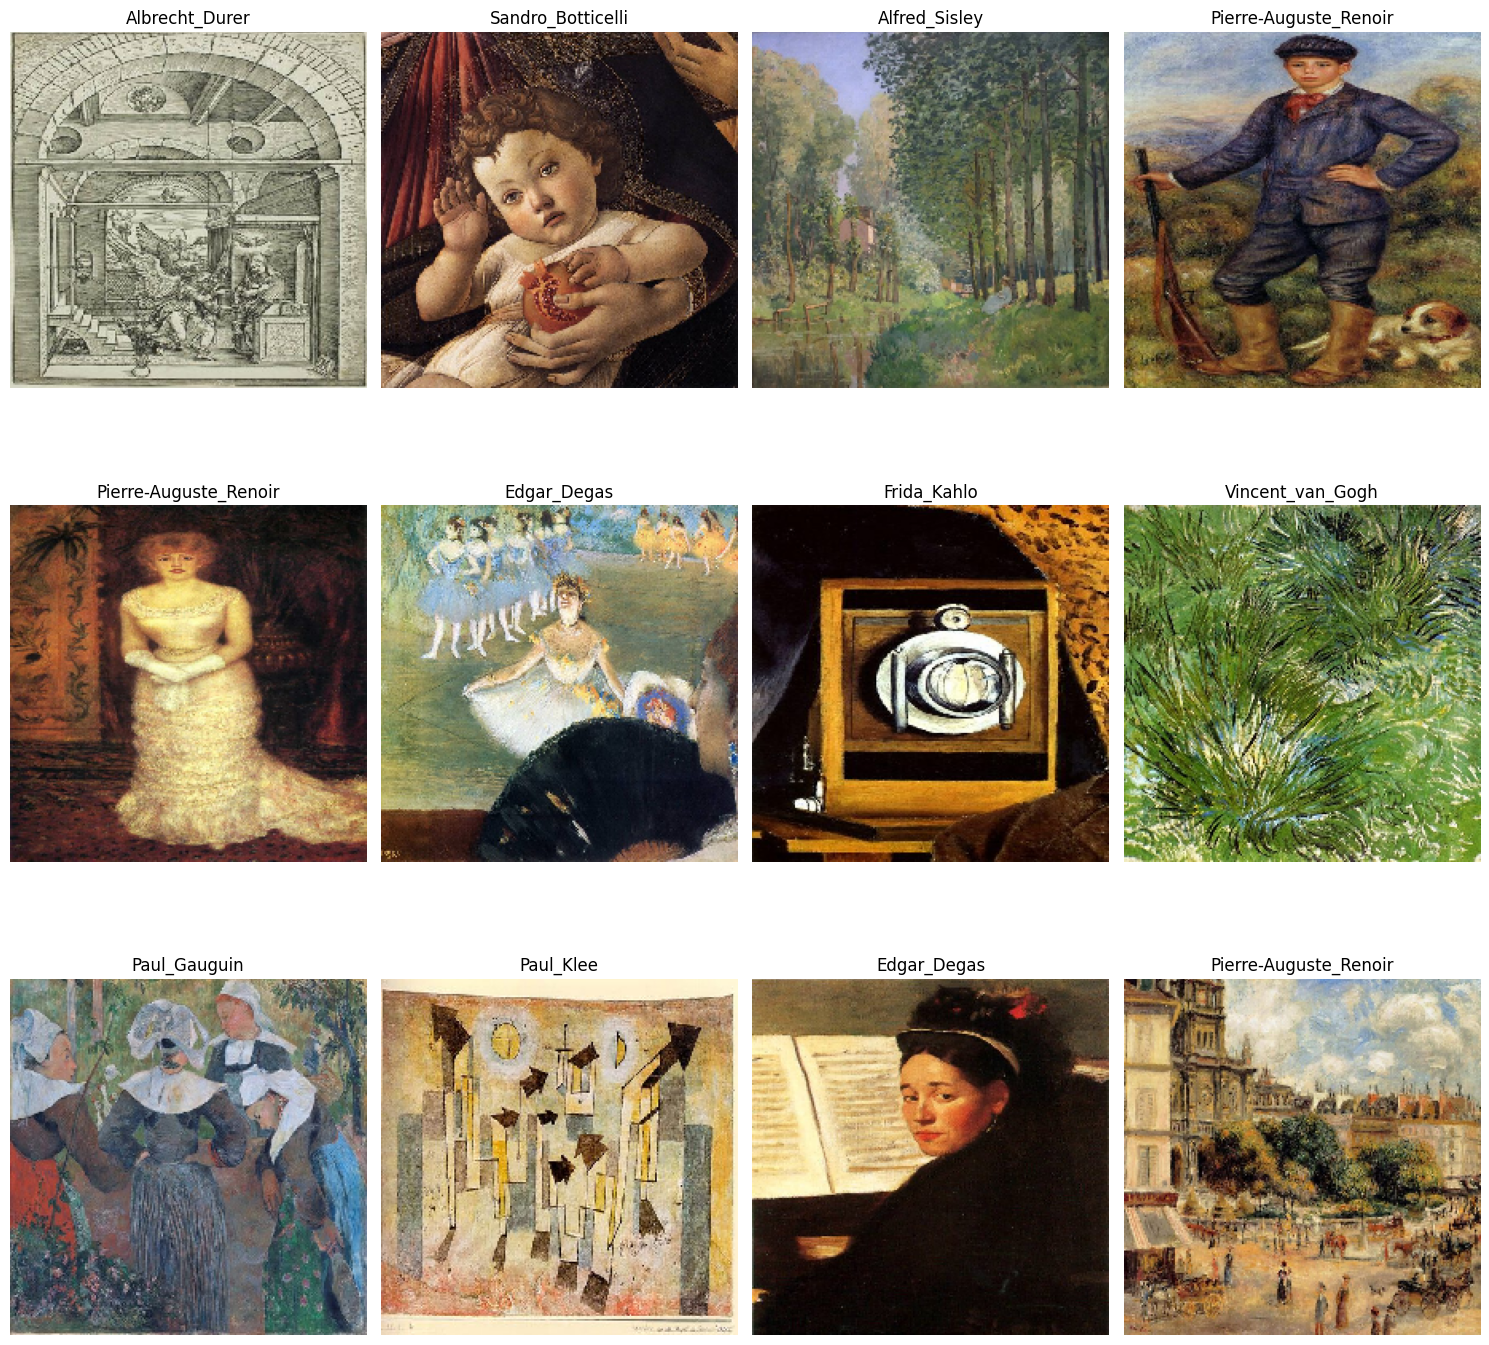

In [18]:
fig, axes = plt.subplots(3, 4, figsize=(15, 15))
random_indices = np.random.choice(df_train.index, size=12, replace=False)
for i, ax in zip(random_indices, axes.flatten()):
    img = keras.preprocessing.image.load_img(df_train.full_path[i], target_size=(224, 224))
    ax.imshow(img)
    ax.set_title(df_train.painter[i])
    ax.axis('off')
plt.tight_layout()
plt.show()

In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_train['label'] = le.fit_transform(df_train.painter)
df_train.head()

full_path                painter  label
0  data/Pierre-Auguste_Renoir_7.jpg  Pierre-Auguste_Renoir     17
1          data/Paul_Gauguin_80.jpg           Paul_Gauguin     14
2        data/Alfred_Sisley_257.jpg          Alfred_Sisley      1
3        data/Pablo_Picasso_266.jpg          Pablo_Picasso     13
4         data/Marc_Chagall_100.jpg           Marc_Chagall     11

In [20]:
print(df_train['label'].unique().min())
print(df_train['label'].unique().max())

0
24


In [21]:
import shutil

# create a folder for each label
for label in df_train.label.unique():
    os.makedirs(f'data/{label}', exist_ok=True)

# move each image to its corresponding label folder
for i, row in df_train.iterrows():
    shutil.move(row.full_path, f'data/{row.label}')

In [22]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 64
NUM_CLASSES = len(class_names)

In [23]:
from keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    directory='./data/',
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset='training'
)

# find the class names so in prediction time we can map the predictions to the painters properly
class_names = train_dataset.class_names
print('Class names:', class_names)

val_dataset = image_dataset_from_directory(
    directory='./data/',
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,
    shuffle=False,
    seed=42,
    validation_split=0.2,
    subset='validation'
)

Found 6516 files belonging to 25 classes.
Using 5213 files for training.
Class names: ['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '3', '4', '5', '6', '7', '8', '9']
Found 6516 files belonging to 25 classes.
Using 1303 files for validation.


In [24]:
from keras.applications.resnet50 import preprocess_input

# Preprocess the data
train_dataset = train_dataset.map(lambda x, y: (preprocess_input(x), y))
val_dataset = val_dataset.map(lambda x, y: (preprocess_input(x), y))

In [25]:
import plotly.express as px

# metric: 'accuracy' or 'loss'
def display_curves(history, metric):
  df = pd.DataFrame(history.history[metric], columns=[metric])
  df['val_'+metric] = history.history['val_'+metric]
  fig = px.line(df, x= df.index+1, y= [metric, 'val_'+metric])
  fig.update_layout(xaxis_title='Epochs', yaxis_title=metric)
  fig.show()

In [26]:
model1 = keras.applications.ResNet50(input_shape= IMAGE_SIZE + (3,),
                                     classes= NUM_CLASSES,
                                     weights= None)

In [27]:
model1.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 23,638,937 (90.18 MB)

 Trainable params: 23,585,817 (89.97 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [28]:
model1.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint("model.keras", save_best_only=True, monitor="val_loss")
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)

EPOCHS = 15
history1 = model1.fit(train_dataset,
                     validation_data = val_dataset,
                     epochs = EPOCHS,
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 181s 1s/step - accuracy: 0.2012 - loss: 3.7001 - val_accuracy: 0.0330 - val_loss: 23.3870
Epoch 2/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 117s 763ms/step - accuracy: 0.3013 - loss: 2.5260 - val_accuracy: 0.0130 - val_loss: 3.6510
Epoch 3/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 79s 727ms/step - accuracy: 0.3676 - loss: 2.1804 - val_accuracy: 0.3085 - val_loss: 2.4270
Epoch 4/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 55s 668ms/step - accuracy: 0.3906 - loss: 2.0597 - val_accuracy: 0.2924 - val_loss: 15.8800
Epoch 5/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 83s 686ms/step - accuracy: 0.4141 - loss: 1.9569 - val_accuracy: 0.2870 - val_loss: 3.3887
Epoch 6/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 84s 709ms/step - accuracy: 0.4641 - loss: 1.7902 - val_accuracy: 0.3124 - val_loss: 2.3998
Epoch 7/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 85s 742ms/step - accuracy: 0.4916 - loss: 1.6876 - val_accuracy: 0.2356 - val_loss: 2.5949
Epoch 8/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 60s 729ms/step - accuracy: 0.5050 - loss: 1.6344 - val_acc

In [29]:
display_curves(history1, 'loss')

In [30]:
display_curves(history1, 'accuracy')

In [31]:
model2 = keras.applications.ResNet50(input_shape= IMAGE_SIZE + (3,),
                                     weights= 'imagenet',
                                     include_top= False,
                                     pooling= 'avg')
model2.trainable = False
x = keras.layers.Flatten()(model2.output)
x = keras.layers.Dense(512,activation='relu')(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.Dense(NUM_CLASSES, activation='softmax')(x)
model2 = keras.models.Model(model2.input, x)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [32]:
model2.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 24,649,625 (94.03 MB)

 Trainable params: 1,061,913 (4.05 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [33]:
model2.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint("model2.keras", save_best_only=True, monitor="val_loss")
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)

EPOCHS = 15
history2 = model2.fit(train_dataset,
                     validation_data = val_dataset,
                     epochs = EPOCHS,
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 55s 523ms/step - accuracy: 0.3936 - loss: 2.3574 - val_accuracy: 0.7015 - val_loss: 1.0324
Epoch 2/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 38s 465ms/step - accuracy: 0.7319 - loss: 0.8718 - val_accuracy: 0.8680 - val_loss: 0.4826
Epoch 3/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 39s 437ms/step - accuracy: 0.8213 - loss: 0.5852 - val_accuracy: 0.9071 - val_loss: 0.3493
Epoch 4/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 38s 396ms/step - accuracy: 0.8768 - loss: 0.4092 - val_accuracy: 0.9294 - val_loss: 0.2755
Epoch 5/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 41s 397ms/step - accuracy: 0.9002 - loss: 0.3048 - val_accuracy: 0.9186 - val_loss: 0.2558
Epoch 6/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 32s 388ms/step - accuracy: 0.9231 - loss: 0.2502 - val_accuracy: 0.8926 - val_loss: 0.3787
Epoch 7/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 47s 465ms/step - accuracy: 0.9449 - loss: 0.1836 - val_accuracy: 0.9417 - val_loss: 0.2298
Epoch 8/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 37s 448ms/step - accuracy: 0.9579 - loss: 0.1495 - val_accu

In [34]:
display_curves(history2, 'loss')

In [35]:
display_curves(history2, 'accuracy')

In [36]:
best_model = keras.models.load_model("model2.keras")
best_model.evaluate(val_dataset)

21/21 ━━━━━━━━━━━━━━━━━━━━ 14s 304ms/step - accuracy: 0.9715 - loss: 0.1140


[0.1470511555671692, 0.9623944759368896]

In [37]:
test_dataset = image_dataset_from_directory(
    directory='./test_data/',
    label_mode=None,
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,
    shuffle=False
)
image_names = [img.split('/')[-1].split('.jpg')[0] for img in test_dataset.file_paths]
test_dataset = test_dataset.map(lambda x: preprocess_input(x))

Found 300 files.


In [38]:
predictions = best_model.predict(test_dataset)

5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step


In [39]:
predictions = np.argmax(predictions, axis=1)
predictions = [int(class_names[pred]) for pred in predictions]

In [40]:
predictions = le.inverse_transform(predictions)

In [41]:
submission = pd.DataFrame(columns=['file', 'artist'])
submission['file'] = image_names
submission['artist'] = predictions
submission

file                 artist
0      test_0      Leonardo_da_Vinci
1      test_1            Andy_Warhol
2     test_10         Albrecht_Durer
3    test_100          Pablo_Picasso
4    test_101         Francisco_Goya
..        ...                    ...
295   test_95  Pierre-Auguste_Renoir
296   test_96         Francisco_Goya
297   test_97          Rene_Magritte
298   test_98          Rene_Magritte
299   test_99              Paul_Klee

[300 rows x 2 columns]